### Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

In [81]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [82]:
#To read the data
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
#check the first five values
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,60562,Female,21.0,0,0,No,Private,Rural,55.12,21.8,Non-smoker,0
1,37404,Male,42.0,0,0,Yes,Private,Urban,55.22,27.0,Non-smoker,0
2,43028,Male,66.0,0,0,Yes,Self-employed,Rural,55.23,28.9,Unknown,0
3,61300,NaN,20.0,0,0,No,Private,Urban,55.25,20.4,Non-smoker,0
4,72547,Male,61.0,0,0,Yes,Private,Rural,55.26,33.2,Unknown,0


In [83]:
#check the last five values
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,27626,Female,60.0,0,0,No,Govt_job,Rural,266.59,25.5,Non-smoker,0
5106,10995,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,Non-smoker,0
5107,26267,Female,76.0,0,0,Yes,Self-employed,Urban,267.61,27.9,Formelly-smoker,0
5108,22440,Female,49.0,0,0,Yes,Private,Urban,267.76,29.3,Smoker,0
5109,69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,Formelly-smoker,1


## 1. Data Analysis

In [84]:
#check the dimension of the data
df.shape

(5110, 12)

In [85]:
# summary of all the variable in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5066 non-null   object 
 2   age                4820 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5050 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


    The data set has 12 variables out of which 7 are numerical, and 6 are categorical. 
    4 variables have null values (gender,age, Residence_typr, bmi).

In [86]:
# dropping the id column as it donot give any relavent information to this dataset
df.drop('id', axis = 1 , inplace = True)

In [87]:
# Changing datatype of hypertension, heart_disease, and stroke as they have categorical values
df['hypertension'] = df['hypertension'].astype(str)
df['heart_disease'] = df['heart_disease'].astype(str)
df['stroke'] = df['stroke'].astype(str)

#### The statistical summary of numeric variables:

In [88]:
#Summary of numeric variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4820.0,45.681328,20.830368,5.00,29.000,47.000,62.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


      This dataset provides information on individuals' age, average glucose level, and BMI. 
      The mean age is 45.7 years, mean glucose level is 106.1 mg/dL, and mean BMI is 28.9 kg/m^2.

#### The statistical summary of categorical variables:

In [89]:
df.describe(include = object).T

,count,unique,top,freq
gender,5066,2,Female,2969
hypertension,5110,2,0,4612
heart_disease,5110,2,0,4834
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5050,2,Urban,2566
smoking_status,5110,4,Non-smoker,1892
stroke,5110,2,0,4861


    This dataset provides that unique values that are from 2 to 5
    The most frequent values are female in gender, no hypertension in hypertension, no heart disease in heart_disease, being married in ever_married, private sector in work_type, urban areas in Residence_type, being a smoker in smoking_status.

## Variable type

In [90]:
#check the data type
df.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

     Interpretation: Refer to the data definition and check whether the data has been correctly identified. Now based on the result, classify the various data columns into numerical/categorical attributes:
     Numerical Attributes: age,  avg_glucose_level, bmi
     Categorical attributes : gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke

## Treating Missing values

In [91]:
#check for the number of missing values
missing_values = df.isnull().sum()
missing_values

gender                44
age                  290
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type        60
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Heat map of missing values

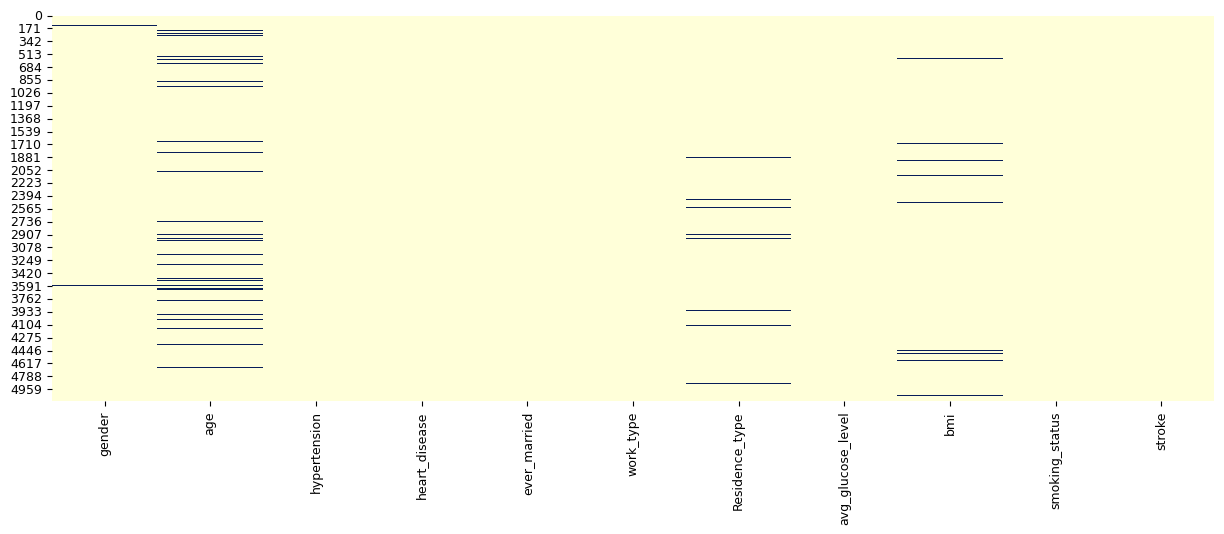

In [92]:
#let us plot a heatmap of the missing values

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df.isnull(),cmap="YlGnBu",cbar=False)

# display the plot
plt.show()

It is seen that there are four variables that have missing data. Let us find the percentage of missing data in each variable. 

In [93]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = list(df.isnull().sum())

# calculate percentage of the missing values
percent = round(((df.isnull().sum()/df.shape[0])*100),2)

percent = [str(i)+"%" for i in percent]

# concatenate the total missing values and percentage of the missing values
missing_data = pd.DataFrame({"total":total,"percent":percent})

#add the data types
missing_data.index=df.columns
missing_data['Type'] = df[missing_data.index].dtypes

#view the missing data   
missing_data.sort_values(by='total', ascending=False, inplace=True)
missing_data

,total,percent,Type
age,290,5.68%,float64
bmi,201,3.93%,float64
Residence_type,60,1.17%,object
gender,44,0.86%,object
hypertension,0,0.0%,object
heart_disease,0,0.0%,object
ever_married,0,0.0%,object
work_type,0,0.0%,object
avg_glucose_level,0,0.0%,float64
smoking_status,0,0.0%,object


    The variable representing the age has 5.68% missing data. Similarly bmi has 3.94% missing value and Residence_type has 1.17% missing values.
    Note : If more than 70% of the data is missing we exclude the column from further analysis. 

### 1 . Age

In [94]:
# get the count of missing values in age
df.age.isnull().sum()

290

    There are 290 missing values detected by python.
    This is a numerical variable so we will replace NaN values with mean.

In [95]:
df.age.replace(np.NaN,df.age.mean(),inplace = True)

In [96]:
# check if there are  null values
df.age.isnull().sum()

0

There are no more missing values in the data.
    

### 2 . BMI

In [97]:
# check if there are  null values in bmi
df.bmi.isnull().sum()

201

      There are 201 missing values detected by python.
      This is a numerical variable so we will replace NaN values with mean.

In [98]:
df.bmi.replace(np.NaN,df.bmi.mean() ,inplace = True)

In [99]:
# check if there are  null values
df.bmi.isnull().sum()

0

### 3 . Gender

In [100]:
# check if there are  null values in gender
df.gender.isnull().sum()

44

    There are 44 missing values detected by python
    This is a numerical variable so we will replace NaN values with mean.

In [101]:
df.gender.mode()

0    Female
Name: gender, dtype: object

In [102]:
df.gender.replace(np.NaN,'Female',inplace = True)

In [103]:
# check if there are  null values
df.gender.isnull().sum()

0

### 4 . Residence_type

In [104]:
# # check if there are  null values in residence_type
df.Residence_type.isna().sum()

60

     There are 60 missing values detected by python
     This is a categorical variable so we will replace NaN values with mode.

In [105]:
df.Residence_type.mode()

0    Urban
Name: Residence_type, dtype: object

In [106]:
df.Residence_type.replace(np.NaN,'Urban',inplace = True)

In [107]:
# check if there are  null values
df.Residence_type.isnull().sum()

0

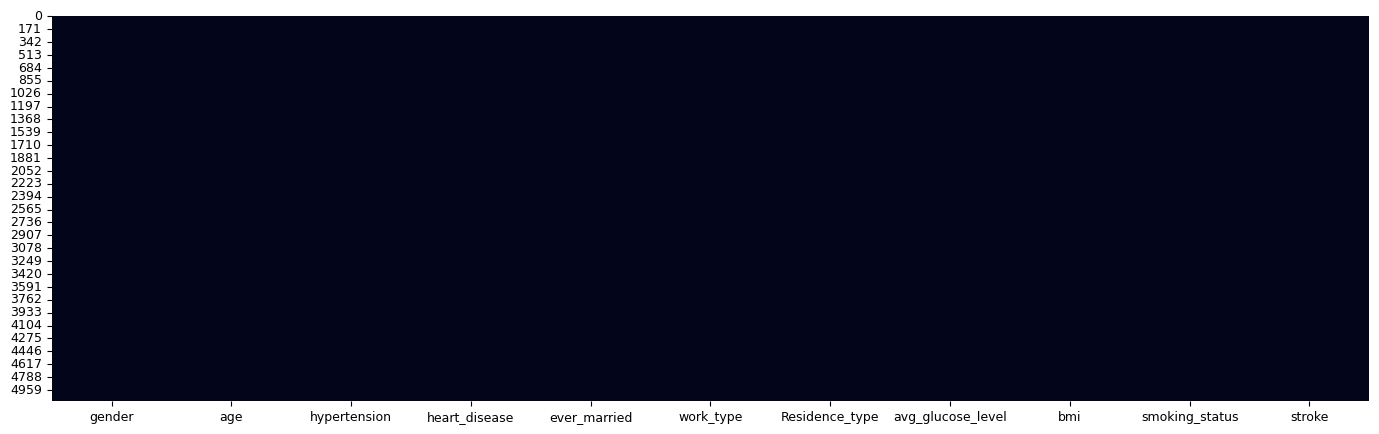

In [108]:
# let us plot a heatmap of the missing values

# import the required libraries
# import the library seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# set the figure size
plt.rcParams["figure.figsize"]=[17,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df.isnull(), cbar = False)

#display the plot
plt.show()

Interpretation: We confirm that the data has no missing values.

## Univariate Analysis

#### Analyze Numerical Variables

In [109]:
df_numeric_features = df.select_dtypes(include='number')
df_numeric_features

,age,avg_glucose_level,bmi
0,21.0,55.12,21.8
1,42.0,55.22,27.0
2,66.0,55.23,28.9
3,20.0,55.25,20.4
4,61.0,55.26,33.2
...,...,...,...
5105,60.0,266.59,25.5
5106,76.0,267.60,30.5
5107,76.0,267.61,27.9
5108,49.0,267.76,29.3


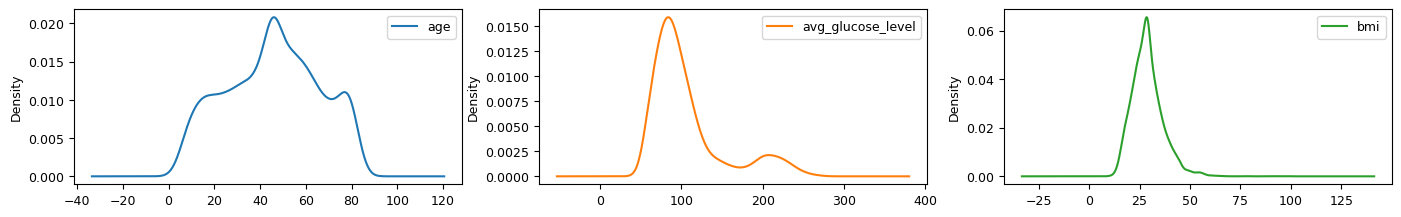

In [110]:
# Distribution of numerical data

df.plot(kind = 'density', subplots = True, layout = (2,3), sharex = False)

# displat the plot
plt.show()

In [111]:
df.skew()

age                 -0.078573
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.076716
stroke               4.193284
dtype: float64

In [112]:
df.skew().age

-0.07857271743610277

The skewness score of -0.078 for Age indicates that the distribution of ages is slightly left-skewed. This means that there are slightly more people with lower ages than higher ages


In [113]:
df.skew().avg_glucose_level

1.5722838665030452

The skewness score of 1.5722 for average glucose level indicates that the distribution of glucose levels is slightly right-skewed. This means that there are slightly more people with higher glucose levels than lower glucose levels


In [114]:
df.skew().bmi

1.0767160713842094

The skewness score of 1.076 for BMI indicates that the distribution of BMIs is slightly right-skewed. This means that there are slightly more people with higher BMIs than lower BMIs.

In [115]:
df.kurtosis()

age                  -0.890061
hypertension          5.375456
heart_disease        13.586052
avg_glucose_level     1.680479
bmi                   3.623061
stroke               15.589736
dtype: float64

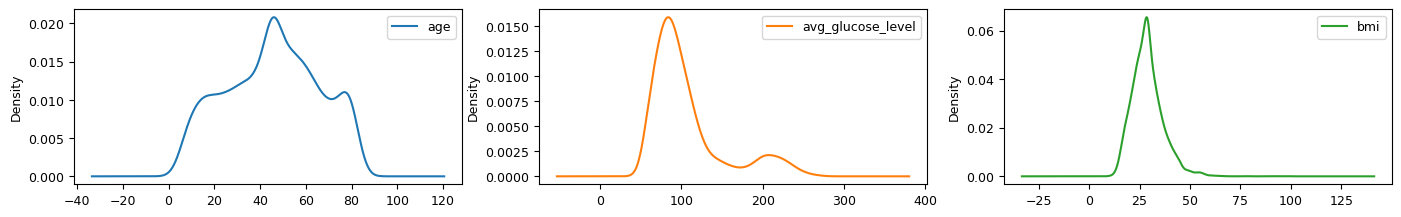

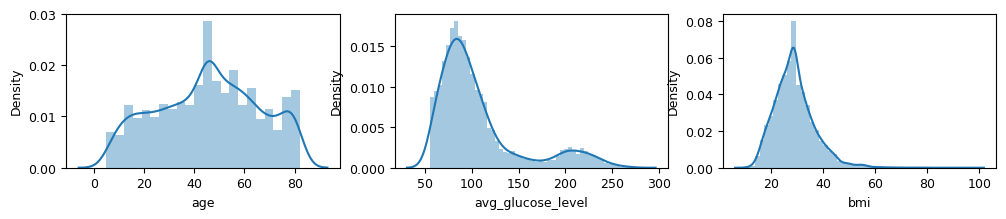

In [116]:
# Distribution of numerical data

df.plot(kind = 'density', subplots = True, layout = (2,3), sharex = False)

# displat the plot
plt.show()

fig, axs = plt.subplots(ncols=3, figsize=(12,2))

sns.distplot(df.age, ax=axs[0])
sns.distplot(df.avg_glucose_level, ax=axs[1])
sns.distplot(df.bmi, ax=axs[2])
plt.show()

#### Analysis of categorical variables

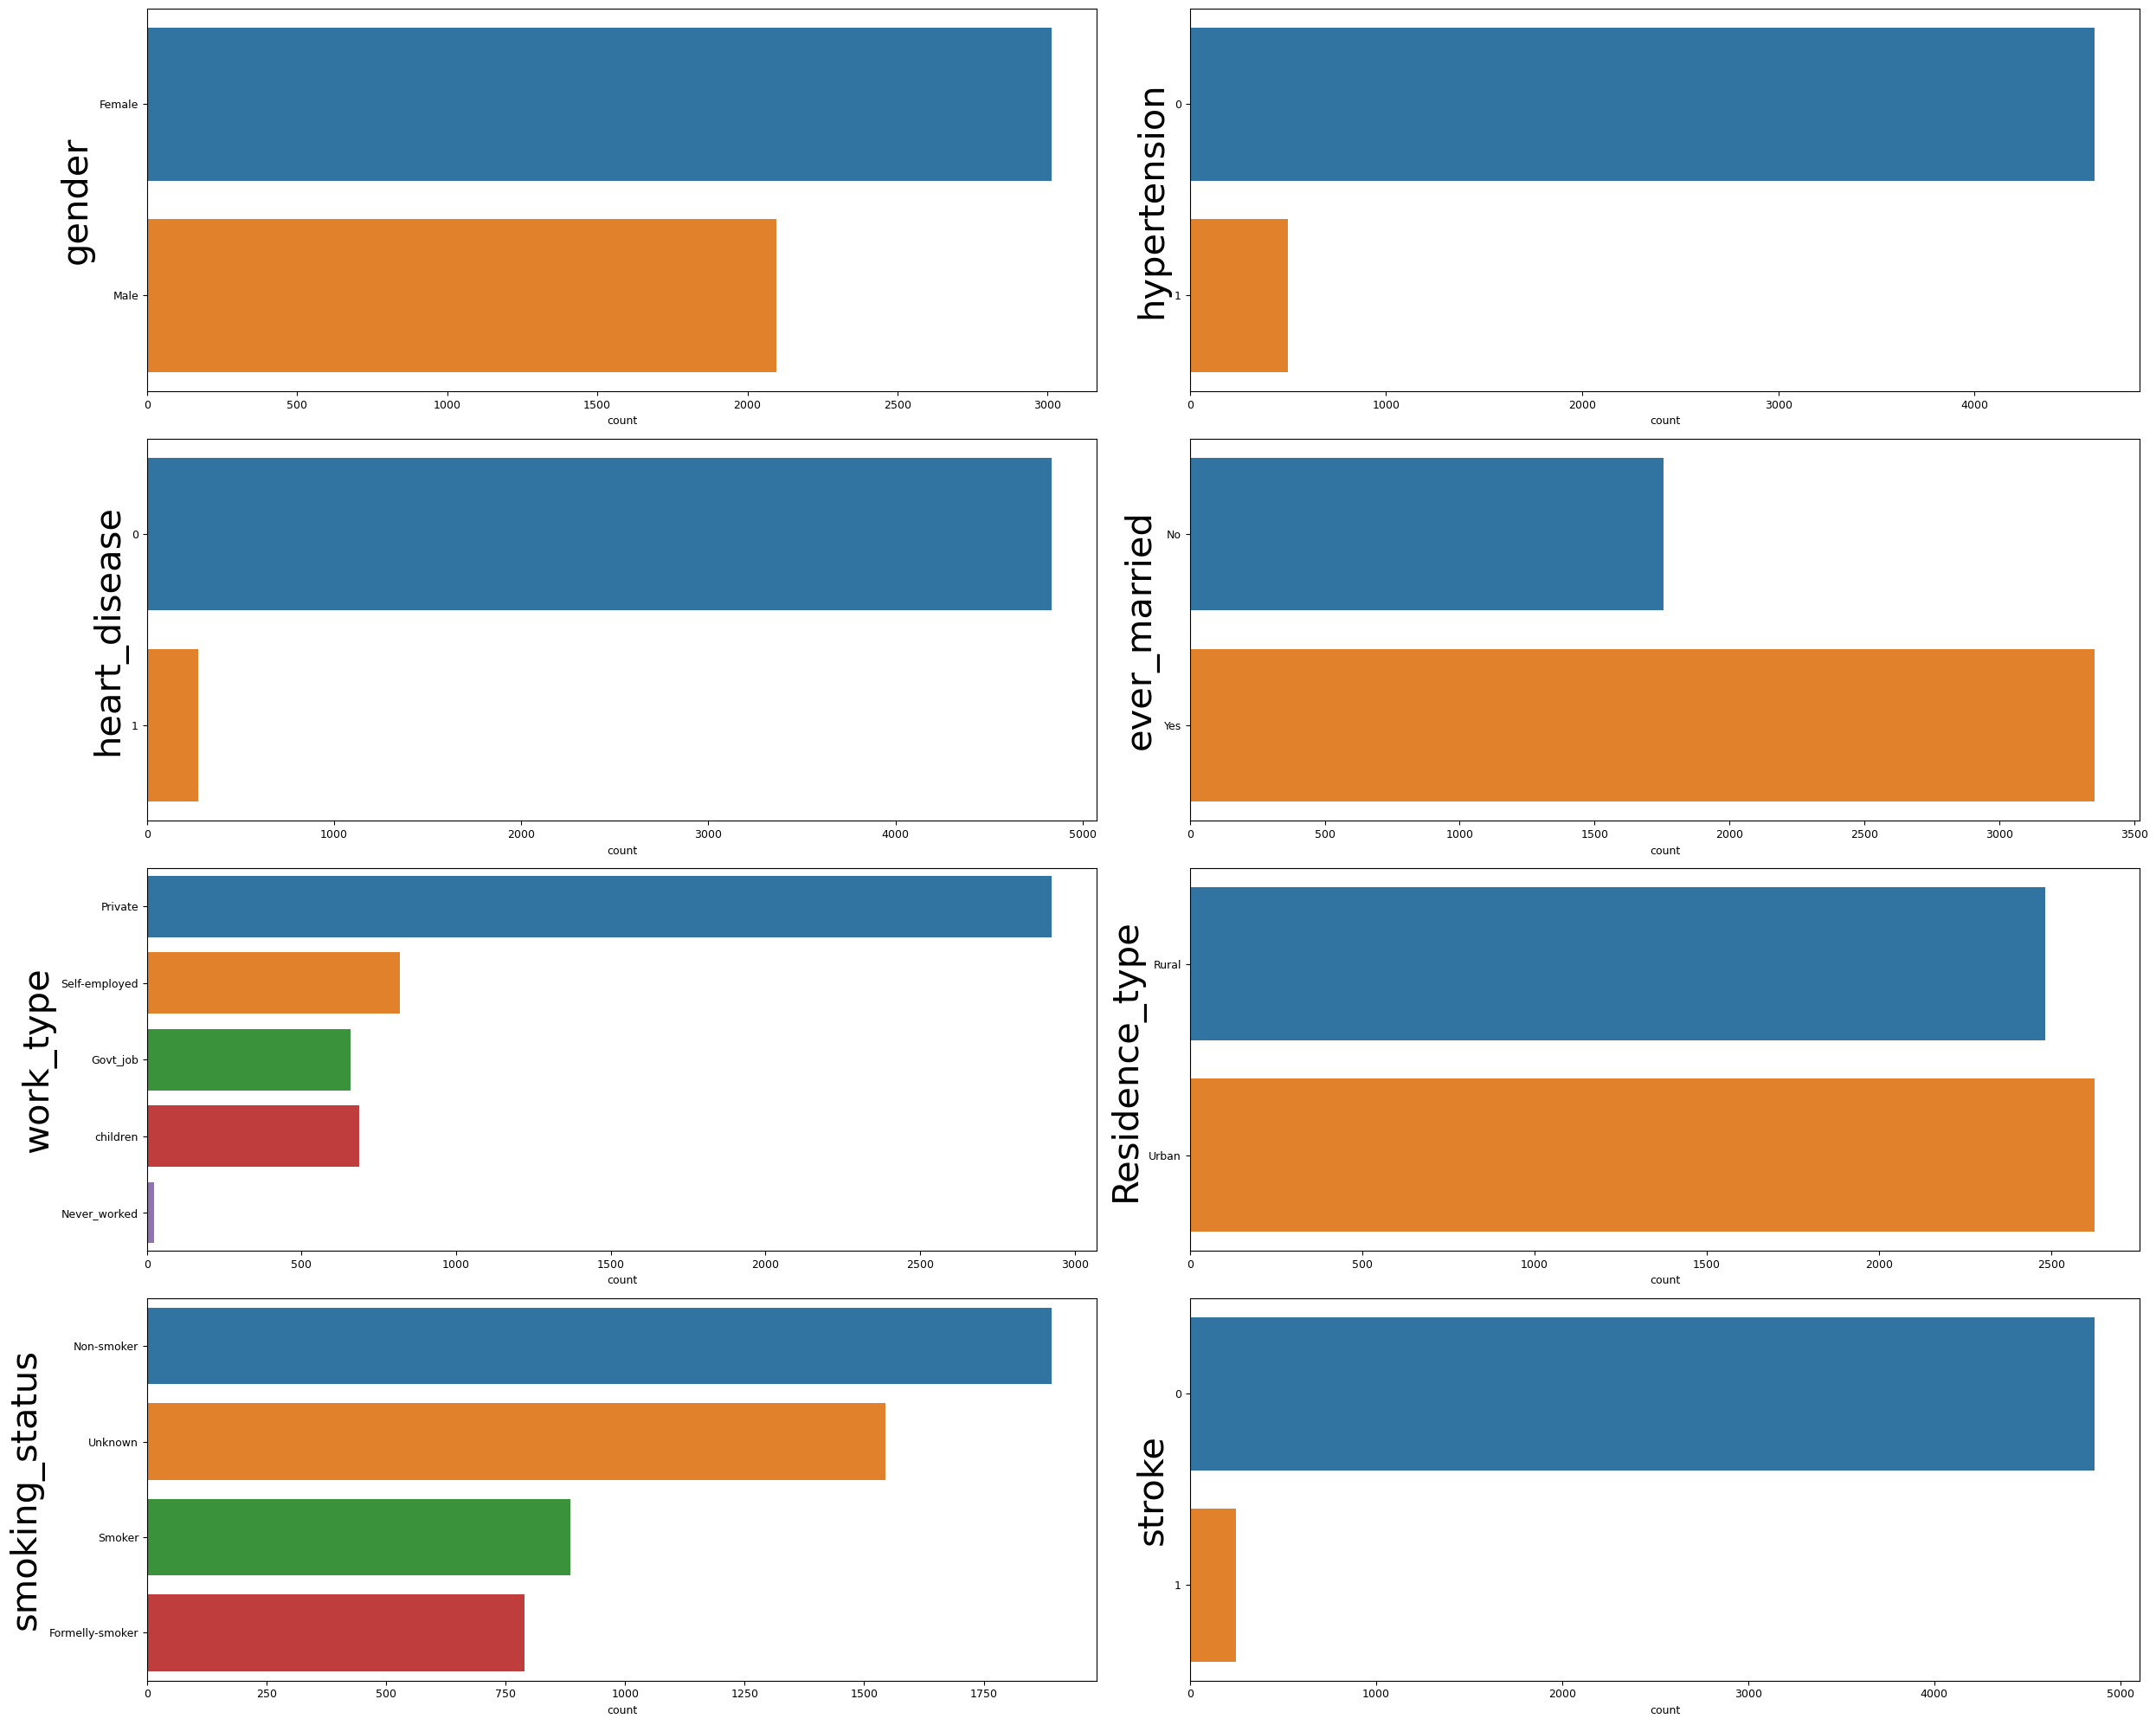

In [117]:
df_categoric_features = df.select_dtypes(include='object').columns
# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(4, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(y=df[variable], ax=subplot)
       
    # set the y-axis labels 
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

#### Analysis of numerical variables

<AxesSubplot:>

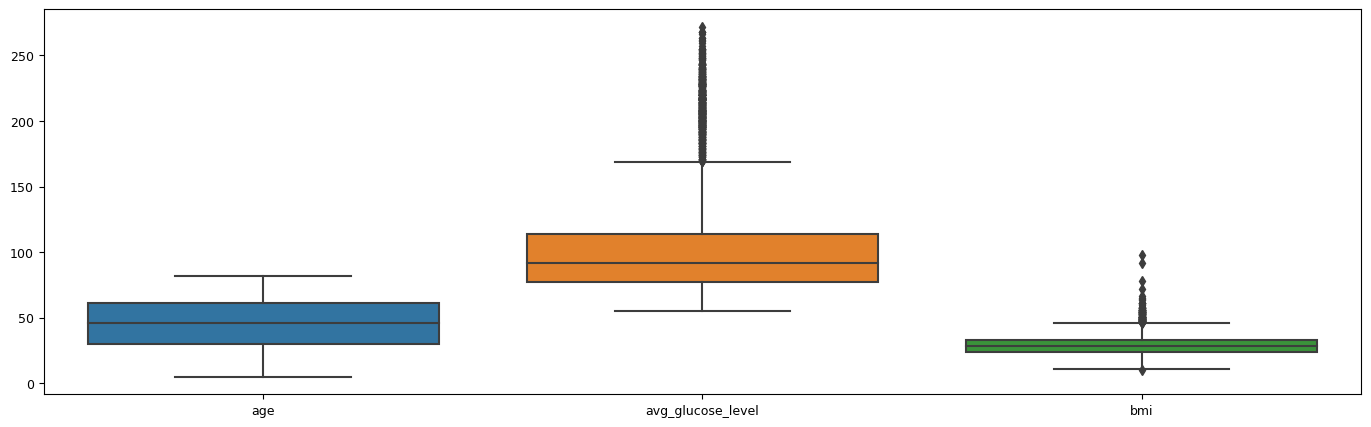

In [118]:
sns.boxplot(data=df_numeric_features)

## Bivariate Analysis

### Analyze Relationship Between Numericals Variable 

<AxesSubplot:>

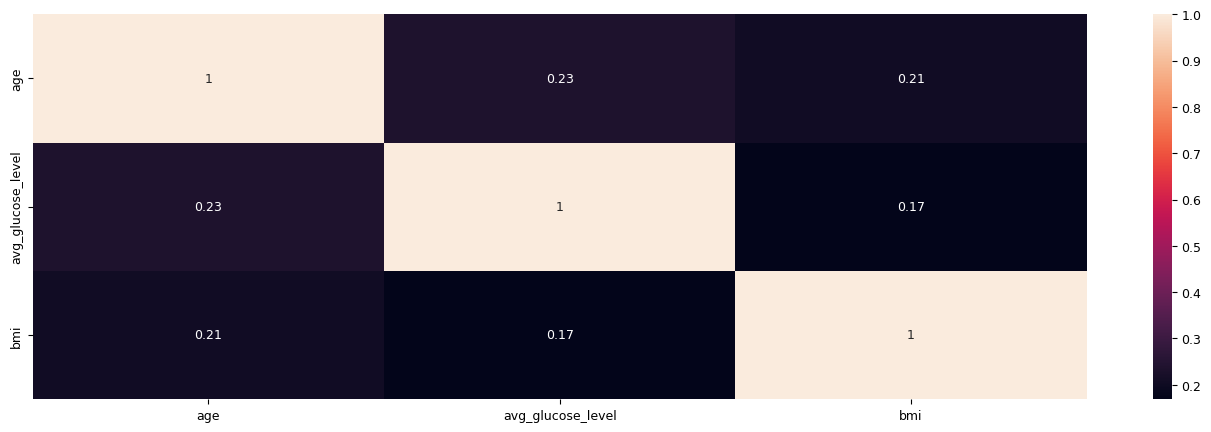

In [119]:
sns.heatmap(df.corr(),annot=True)

The correlation between age and average glucose level (0.23) is stronger compared to age and BMI (0.21), while the correlation between BMI and average glucose level (0.17) is relatively weaker

### Analyze Relationship Between Numerical Variables

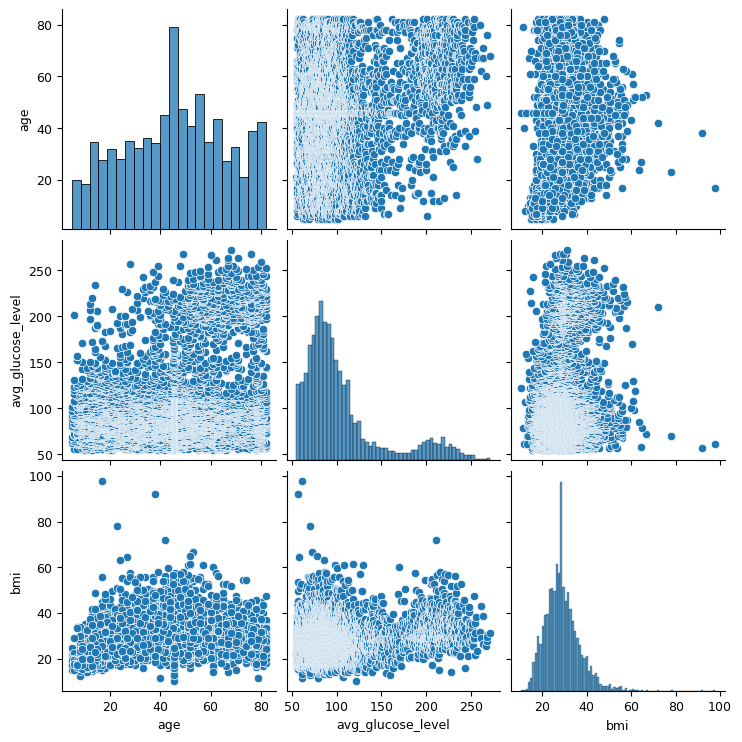

In [120]:
sns.pairplot(df)

We can identifying potential outliers, correlations, and trends in the dataset.

### Analyze Relationship Between Numerical and Target Variable

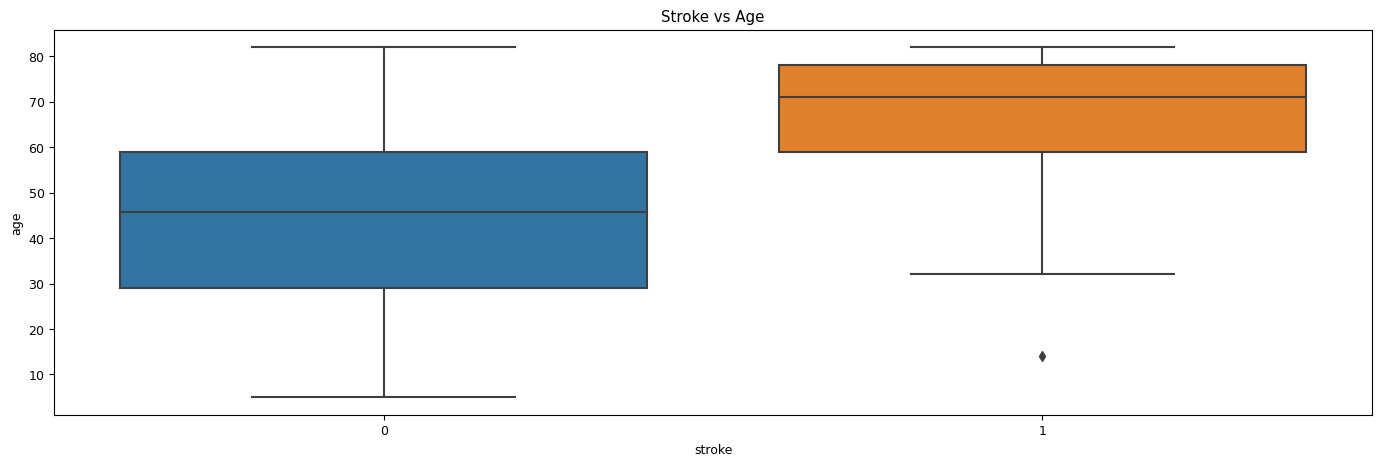

In [121]:
sns.boxplot(x="stroke", y="age", data=df)
plt.title("Stroke vs Age")
plt.show()


    There are 25% people who doesn't have heart stroke in age between 60-80 years. 
    The probability of experiencing a heart stroke among individuals aged between 60 and 80 years is 75%

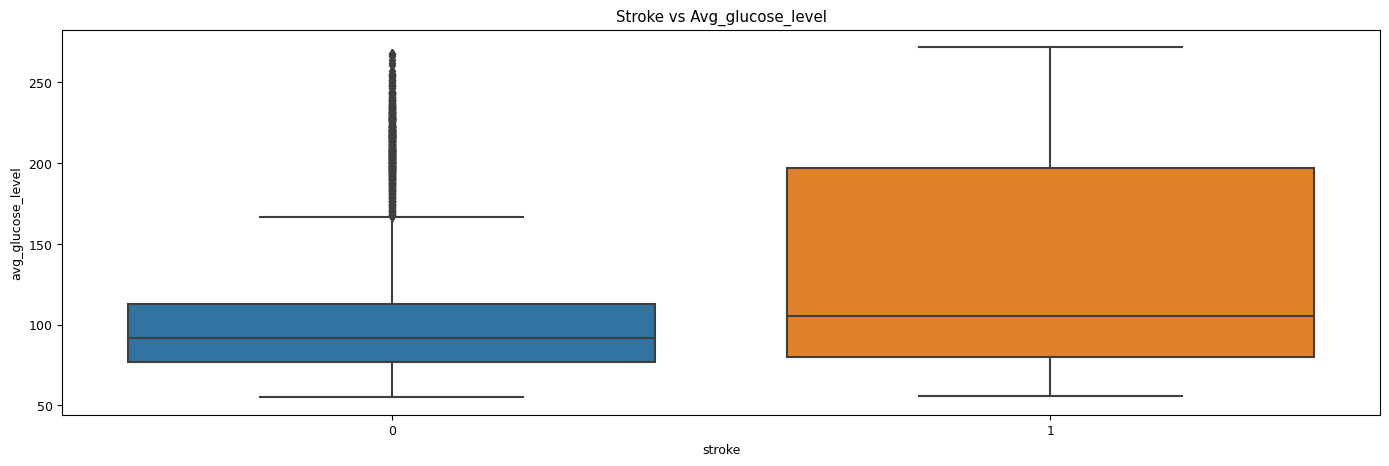

In [122]:
sns.boxplot(x="stroke", y="avg_glucose_level", data=df)
plt.title("Stroke vs Avg_glucose_level")
plt.show()

    There are 75% chances who have heart stroke and their avg_glucose_level is between 50-200
    whose avg_glucose_level is 50-100 they have 75% chance of not having heart stroke

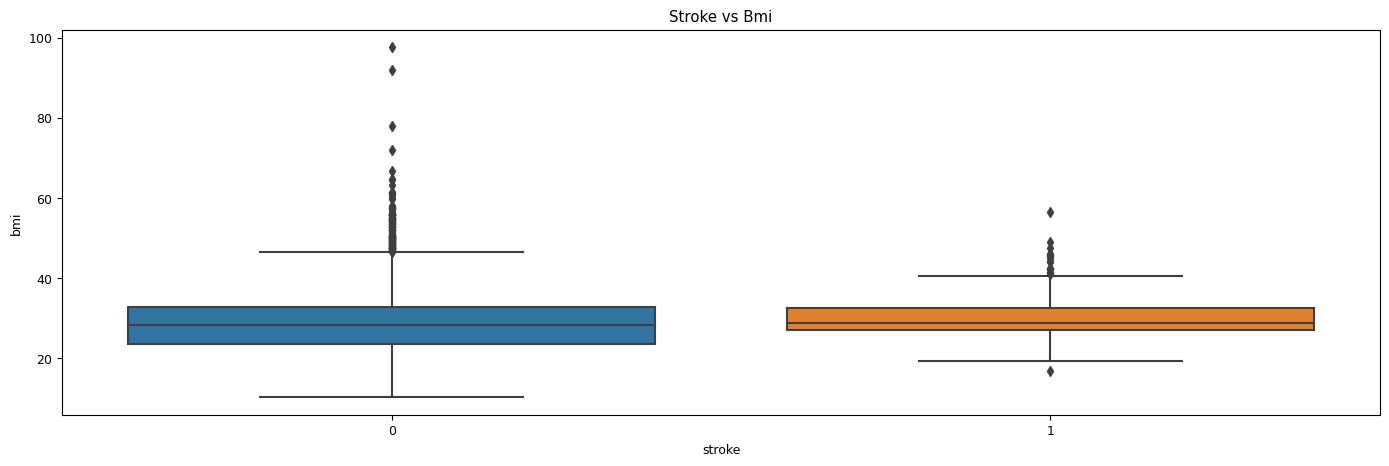

In [123]:
sns.boxplot(x="stroke", y="bmi", data=df)
plt.title("Stroke vs Bmi")

plt.show()

There are more chances of having heart stroke whose bmi is between 20-37


# Hypothesis Testing

## Chi square Test

#### For hypertension and stroke

h0: There is no significant relation between hypertension and stroke

h1: There is significant relation between hypertension and stroke

In [124]:
import pandas as pd
from scipy.stats import chi2_contingency

# Columns: hypertension  (categorical), stroke (binary)

# Create a contingency table of hypertension and stroke
contingency_table = pd.crosstab(df['hypertension'], df['stroke'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)


Chi-square statistic: 81.6053682482931
p-value: 1.661621901511823e-19
Degrees of freedom: 1
Expected frequencies: [[4387.2665362  224.7334638]
 [ 473.7334638   24.2665362]]


P_value < 0.05 , Reject H0

There is significant relation between hypertension and stroke

### For gender and stroke

h0: There is no significant relation between gender and stroke

h1: There is significaant relation between gender and stroke

In [125]:
import pandas as pd
from scipy.stats import chi2_contingency

# Columns: gender (categorical), stroke (binary)

# Create a contingency table of gender and stroke
contingency_table = pd.crosstab(df['gender'], df['stroke'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)


Chi-square statistic: 0.09370191858116662
p-value: 0.7595226521461761
Degrees of freedom: 1
Expected frequencies: [[2866.18258317  146.81741683]
 [1994.81741683  102.18258317]]


P_value > 0.05 , Retain H0

here is no significant relation between gender and stroke

## T-test for age and stroke

H0: There is no significant association between age and the occurrence of a stroke.

H1: There is a significant association between age and the occurrence of a stroke.

In [126]:
from scipy.stats import ttest_ind

# Columns: age (continuous), stroke (binary: 0 - no stroke, 1 - stroke)

# Divide the data into two groups based on stroke occurrence
age_stroke = df[df['stroke'] == '1']['age']
age_no_stroke = df[df['stroke'] == '0']['age']

# Perform the t-test
t_statistic, p_value = ttest_ind(age_stroke, age_no_stroke)

# Print the results
print("T-statistic:", t_statistic)
print("p-value:", p_value)


T-statistic: 18.304939731819307
p-value: 1.510403810079841e-72


P_value < 0.05, Reject H0

There is a significant association between age and the occurrence of a stroke.

## T-test for bmi and stroke

H0: There is no significant association between bmi and the occurrence of a stroke.

H1: There is a significant association between bmi and the occurrence of a stroke.

In [127]:
from scipy.stats import ttest_ind

# Columns: bmi (continuous), stroke (binary: 0 - no stroke, 1 - stroke)

# Divide the data into two groups based on stroke occurrence
age_stroke = df[df['stroke'] == '1']['bmi']
age_no_stroke = df[df['stroke'] == '0']['bmi']

# Perform the t-test
t_statistic, p_value = ttest_ind(age_stroke, age_no_stroke)

# Print the results
print("T-statistic:", t_statistic)
print("p-value:", p_value)


T-statistic: 2.7856373874120712
p-value: 0.00536195712940378


P_value > 0.05, Retain H0

There is no significant association between bmi and the occurrence of a stroke.

## Anova Test

H0 (Null Hypothesis): There is no significant difference in the mean age among different hypertension groups.

H1 (Alternative Hypothesis): There is a significant difference in the mean age among different hypertension groups.

In [128]:
import pandas as pd
from scipy.stats import f_oneway

# Subset the relevant columns from the dataset
data_subset = df[['smoking_status', 'age']].copy()

# Create separate groups for each smoking status category
groups = [data_subset[data_subset['smoking_status'] == 'Non-smoker']['age'],
          data_subset[data_subset['smoking_status'] == 'Smoker']['age'],
          data_subset[data_subset['smoking_status'] == 'Formelly-smoker']['age'],
          data_subset[data_subset['smoking_status'] == 'Unknown']['age']]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)



F-statistic: 142.91173684851458
p-value: 6.392260540195801e-89


there is a statistically significant difference in the mean age between individuals with and without hypertension.

### Analyze Relationship Between Categorical and Target Variables

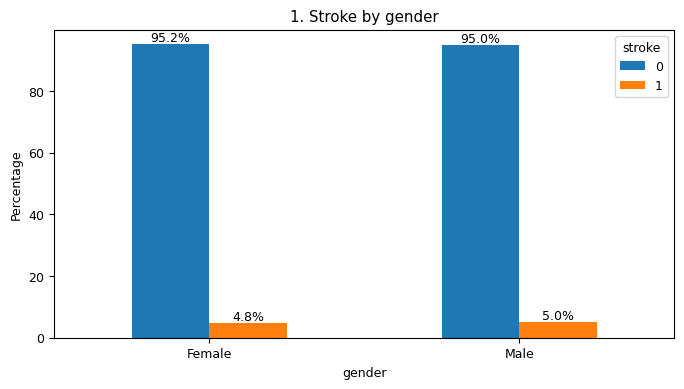

There is no significant difference in the incidence of stroke between males and females. However ,the percentage of females who have experienced a stroke is slightly lower than that of males. 

------------------------------------------------------------------------------------------------------------------------


<Figure size 1700x500 with 0 Axes>

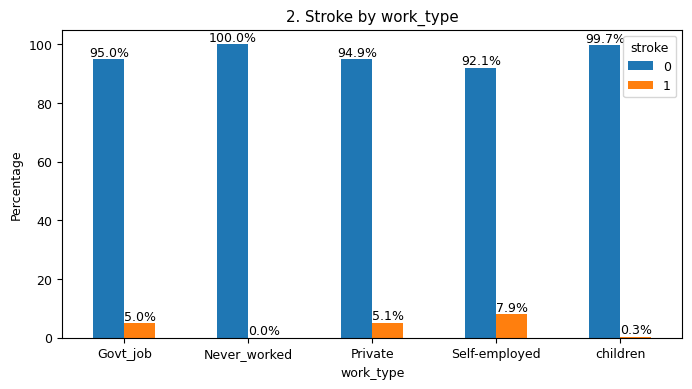

Individuals who are self-employed have a higher risk of experiencing a stroke compared to those in private or government jobs. 

------------------------------------------------------------------------------------------------------------------------


<Figure size 1700x500 with 0 Axes>

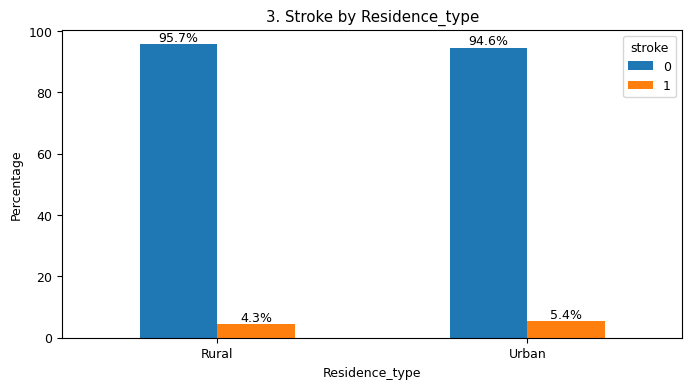

There is no significant difference in the incidence of stroke between individuals residing in urban or rural areas. 

------------------------------------------------------------------------------------------------------------------------


<Figure size 1700x500 with 0 Axes>

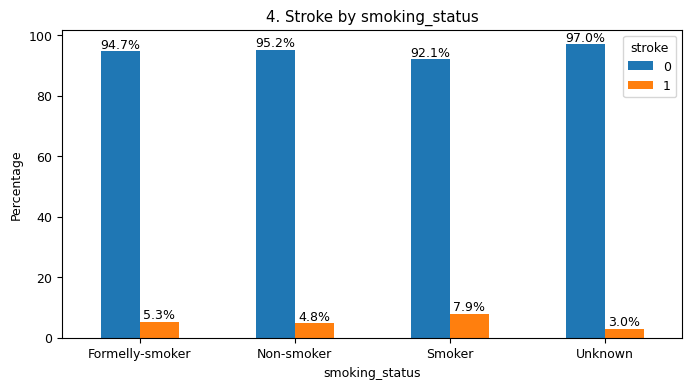

Smoking increases the risk of experiencing a stroke compared to being a former smoker or a non-smoker. 

------------------------------------------------------------------------------------------------------------------------


<Figure size 1700x500 with 0 Axes>

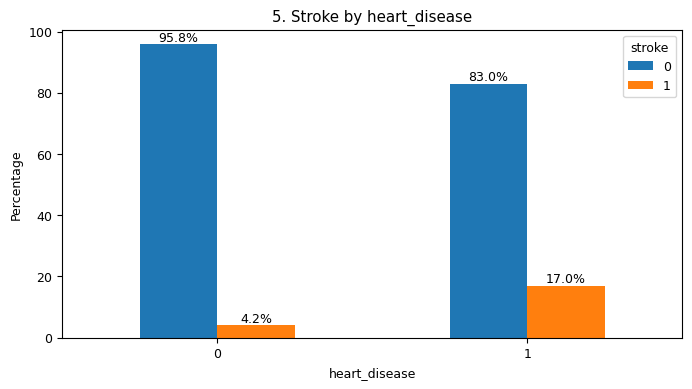

Having pre-existing conditions such as heart disease increases the risk of experiencing a stroke. 

------------------------------------------------------------------------------------------------------------------------


<Figure size 1700x500 with 0 Axes>

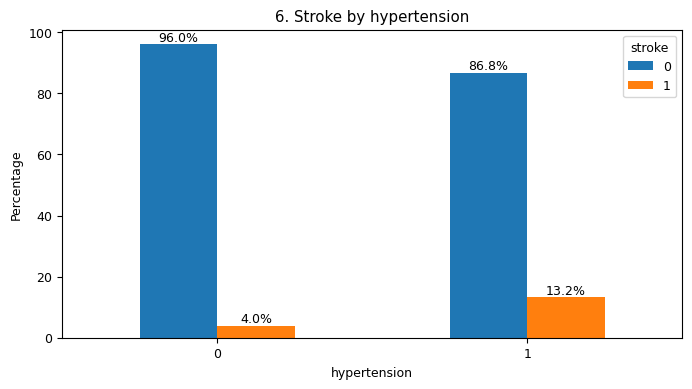

Having pre-existing conditions such as hypertension increases the risk of experiencing a stroke. 

------------------------------------------------------------------------------------------------------------------------


<Figure size 1700x500 with 0 Axes>

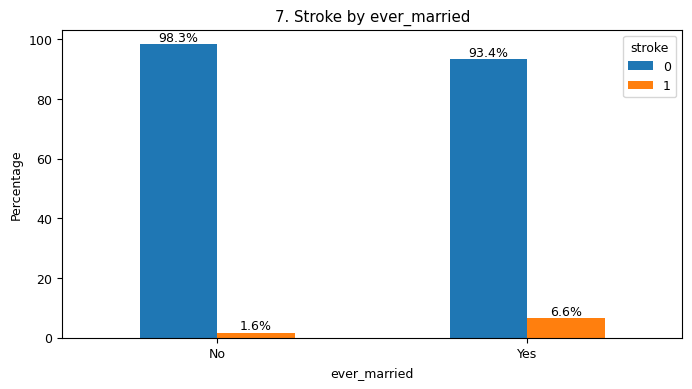

Married individuals have a higher risk of experiencing a stroke compared to those who are not married. 

------------------------------------------------------------------------------------------------------------------------


<Figure size 1700x500 with 0 Axes>

In [129]:
l=['gender','work_type','Residence_type','smoking_status','heart_disease','hypertension','ever_married']
lis =  ["There is no significant difference in the incidence of stroke between males and females. However ,the percentage of females who have experienced a stroke is slightly lower than that of males.",
"Individuals who are self-employed have a higher risk of experiencing a stroke compared to those in private or government jobs.",
"There is no significant difference in the incidence of stroke between individuals residing in urban or rural areas.",
"Smoking increases the risk of experiencing a stroke compared to being a former smoker or a non-smoker.",
"Having pre-existing conditions such as heart disease increases the risk of experiencing a stroke.",
"Having pre-existing conditions such as hypertension increases the risk of experiencing a stroke.",
"Married individuals have a higher risk of experiencing a stroke compared to those who are not married."]
plt.rcParams.update({'font.size': 9})
for i in range(len(l)):
   
    gender_counts = df[l[i]].value_counts(normalize=True) * 100
    stroke_counts = round(df.groupby(l[i])['stroke'].value_counts(normalize=True) * 100,2)
    crosstab_data = stroke_counts.unstack()

    # Create bar plot
    ax = crosstab_data.plot(kind='bar', figsize=(8,4))
    ax.set_title(f"{i+1}. Stroke by {l[i]}")
    ax.set_ylabel('Percentage')

    # Add data labels to the bars
    for j in ax.containers:
        ax.bar_label(j, labels=[f"{x:.1f}%" for x in j.datavalues], label_type='edge')
    plt.xticks(rotation=0)
    plt.show()
#     plt.savefig(f"{i+1}_Stroke_by_{l[i]}.png")
    plt.savefig(f"{i+1}_Stroke_by_{l[i]}.jpg")
    print(lis[i],"\n")
    print("------------------------------------------------------------------------------------------------------------------------")

### Feature Engineering

#### Outlier Detection

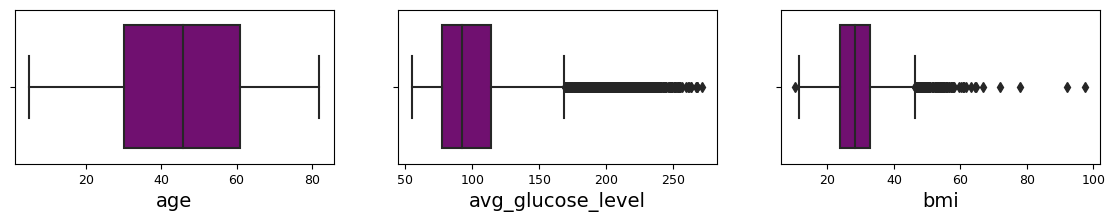

In [130]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
df_num = df.select_dtypes(include='number')

fig, ax = plt.subplots(1,3, figsize=(14, 2))

# plot the boxplot using boxplot() from seaborn

for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # plot tghe box-plots
    z = sns.boxplot(x = df_num[variable], ax=subplot, color="purple")
    # set the x-axis laber
    z.set_xlabel(variable, fontsize = 14) 

There are many outliers in avg_glucose_level and bmi

In [131]:
# obtain the first quartile
Q1 = df_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age                  31.000
avg_glucose_level    36.845
bmi                   9.000
dtype: float64


In [132]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

This line of code removes rows from the DataFrame (df) where any of the values fall outside the range of (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR), where Q1 is the first quartile and Q3 is the third quartile of the data. It is used to filter out potential outliers in the data.

In [133]:
# again checking the shape of the dataset
df.shape

(4391, 11)

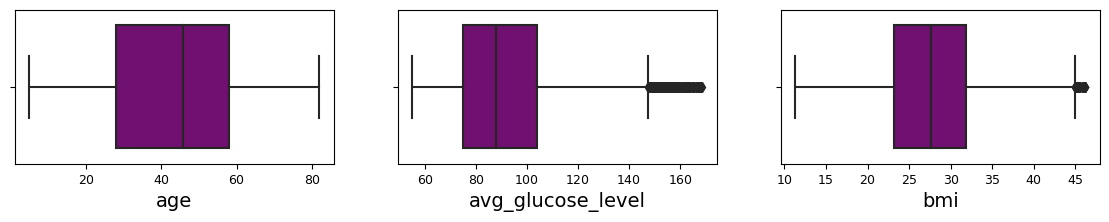

In [134]:
# plot the boxplot for each variable after removing the outliers
# subplots(): plot subplots
# figsize(): set the figure size
df_num = df.select_dtypes(include='number')

fig, ax = plt.subplots(1,3, figsize=(14, 2))

# plot the boxplot using boxplot() from seaborn

for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # plot tghe box-plots
    z = sns.boxplot(x = df_num[variable], ax=subplot, color="purple")
    # set the x-axis label
    z.set_xlabel(variable, fontsize = 14)

#### Encoding of categorical columns

In [135]:
# Label Encoding of 'gender', 'ever_married' and 'Residence_type' because this columns have only 2 unique values
df.gender.unique(),df.ever_married.unique(),df.Residence_type.unique()

(array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Rural', 'Urban'], dtype=object))

In [136]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[['gender', 'ever_married', 'Residence_type']] = df[['gender', 'ever_married','Residence_type']].apply(le.fit_transform)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,21.000000,0,0,0,Private,0,55.12,21.8,Non-smoker,0
1,1,42.000000,0,0,1,Private,1,55.22,27.0,Non-smoker,0
2,1,66.000000,0,0,1,Self-employed,0,55.23,28.9,Unknown,0
3,0,20.000000,0,0,0,Private,1,55.25,20.4,Non-smoker,0
4,1,61.000000,0,0,1,Private,0,55.26,33.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4477,0,77.000000,0,0,1,Govt_job,0,167.59,34.3,Smoker,0
4478,1,45.681328,0,0,0,children,1,167.66,18.7,Unknown,0
4479,1,55.000000,1,0,1,Private,1,168.06,23.5,Formelly-smoker,0
4480,0,26.000000,0,0,0,Private,1,168.15,22.9,Non-smoker,0


In [137]:
df[['gender', 'ever_married', 'Residence_type']] = df[['gender', 'ever_married', 'Residence_type']].astype('object')


In [138]:
# One hot encoding of 'work_type' and 'smoking_status' because this columns have more than two unique values
df.work_type.unique(),df.smoking_status.unique()

(array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 array(['Non-smoker', 'Unknown', 'Smoker', 'Formelly-smoker'], dtype=object))

In [139]:
df=pd.get_dummies(df, columns= ['work_type','smoking_status'],drop_first=True)

In [140]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Non-smoker,smoking_status_Smoker,smoking_status_Unknown
0,0,21.000000,0,0,0,0,55.12,21.8,0,0,1,0,0,1,0,0
1,1,42.000000,0,0,1,1,55.22,27.0,0,0,1,0,0,1,0,0
2,1,66.000000,0,0,1,0,55.23,28.9,0,0,0,1,0,0,0,1
3,0,20.000000,0,0,0,1,55.25,20.4,0,0,1,0,0,1,0,0
4,1,61.000000,0,0,1,0,55.26,33.2,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,0,77.000000,0,0,1,0,167.59,34.3,0,0,0,0,0,0,1,0
4478,1,45.681328,0,0,0,1,167.66,18.7,0,0,0,0,1,0,0,1
4479,1,55.000000,1,0,1,1,168.06,23.5,0,0,1,0,0,0,0,0
4480,0,26.000000,0,0,0,1,168.15,22.9,0,0,1,0,0,1,0,0


#### Standardize the data

In [141]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()
    
# fit the StandardScaler
df[['bmi','avg_glucose_level','age']] = standard_scale.fit_transform(df[['bmi','avg_glucose_level','age']])

In [142]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Non-smoker,smoking_status_Smoker,smoking_status_Unknown
0,0,-1.130294,0,0,0,0,-1.604470,-0.916163,0,0,1,0,0,1,0,0
1,1,-0.084929,0,0,1,1,-1.600057,-0.123661,0,0,1,0,0,1,0,0
2,1,1.109775,0,0,1,0,-1.599616,0.165907,0,0,0,1,0,0,0,1
3,0,-1.180074,0,0,0,1,-1.598733,-1.129529,0,0,1,0,0,1,0,0
4,1,0.860878,0,0,1,0,-1.598292,0.821246,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,0,1.657347,0,0,1,0,3.358932,0.988890,0,0,0,0,0,0,1,0
4478,1,0.098325,0,0,0,1,3.362021,-1.388616,0,0,0,0,1,0,0,1
4479,1,0.562202,1,0,1,1,3.379674,-0.657076,0,0,1,0,0,0,0,0
4480,0,-0.881398,0,0,0,1,3.383645,-0.748518,0,0,1,0,0,1,0,0


In [143]:
df.shape

(4391, 16)

In [144]:
# export the data for using it later
# df.to_csv("healthcare_dataset_strokes_cleaned.csv")

In [145]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Non-smoker,smoking_status_Smoker,smoking_status_Unknown
0,0,-1.130294,0,0,0,0,-1.604470,-0.916163,0,0,1,0,0,1,0,0
1,1,-0.084929,0,0,1,1,-1.600057,-0.123661,0,0,1,0,0,1,0,0
2,1,1.109775,0,0,1,0,-1.599616,0.165907,0,0,0,1,0,0,0,1
3,0,-1.180074,0,0,0,1,-1.598733,-1.129529,0,0,1,0,0,1,0,0
4,1,0.860878,0,0,1,0,-1.598292,0.821246,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,0,1.657347,0,0,1,0,3.358932,0.988890,0,0,0,0,0,0,1,0
4478,1,0.098325,0,0,0,1,3.362021,-1.388616,0,0,0,0,1,0,0,1
4479,1,0.562202,1,0,1,1,3.379674,-0.657076,0,0,1,0,0,0,0,0
4480,0,-0.881398,0,0,0,1,3.383645,-0.748518,0,0,1,0,0,1,0,0


In [146]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print("Before SMOTE:")
print(y.value_counts())

print("After SMOTE:")
print(y_resampled.value_counts())

Before SMOTE:
0    4226
1     165
Name: stroke, dtype: int64
After SMOTE:
0    4226
1    4226
Name: stroke, dtype: int64


In [147]:
X_resampled

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Non-smoker,smoking_status_Smoker,smoking_status_Unknown
0,0.0,-1.130294,0.0,0.0,0.0,0.0,-1.604470,-0.916163,0,1,0,0,1,0,0
1,1.0,-0.084929,0.0,0.0,1.0,1.0,-1.600057,-0.123661,0,1,0,0,1,0,0
2,1.0,1.109775,0.0,0.0,1.0,0.0,-1.599616,0.165907,0,0,1,0,0,0,1
3,0.0,-1.180074,0.0,0.0,0.0,1.0,-1.598733,-1.129529,0,1,0,0,1,0,0
4,1.0,0.860878,0.0,0.0,1.0,0.0,-1.598292,0.821246,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,1.0,0.672641,0.0,0.0,1.0,1.0,-0.500517,0.153169,0,1,0,0,0,0,0
8448,0.913251,1.324125,0.0,0.0,1.0,1.0,0.456956,-0.070794,0,1,0,0,0,1,0
8449,1.0,1.134493,0.394556,0.0,1.0,0.0,1.463805,1.057525,0,0,1,0,0,0,0
8450,1.0,1.836570,0.0,0.0,1.0,1.0,-0.823416,-0.186836,0,1,0,0,0,0,0


In [148]:
df=pd.concat([X_resampled,y_resampled],axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Non-smoker,smoking_status_Smoker,smoking_status_Unknown,stroke
0,0.0,-1.130294,0.0,0.0,0.0,0.0,-1.604470,-0.916163,0,1,0,0,1,0,0,0
1,1.0,-0.084929,0.0,0.0,1.0,1.0,-1.600057,-0.123661,0,1,0,0,1,0,0,0
2,1.0,1.109775,0.0,0.0,1.0,0.0,-1.599616,0.165907,0,0,1,0,0,0,1,0
3,0.0,-1.180074,0.0,0.0,0.0,1.0,-1.598733,-1.129529,0,1,0,0,1,0,0,0
4,1.0,0.860878,0.0,0.0,1.0,0.0,-1.598292,0.821246,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,1.0,0.672641,0.0,0.0,1.0,1.0,-0.500517,0.153169,0,1,0,0,0,0,0,1
8448,0.913251,1.324125,0.0,0.0,1.0,1.0,0.456956,-0.070794,0,1,0,0,0,1,0,1
8449,1.0,1.134493,0.394556,0.0,1.0,0.0,1.463805,1.057525,0,0,1,0,0,0,0,1
8450,1.0,1.836570,0.0,0.0,1.0,1.0,-0.823416,-0.186836,0,1,0,0,0,0,0,1


In [149]:
df.sample(100)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Non-smoker,smoking_status_Smoker,smoking_status_Unknown,stroke
6834,1.0,0.797683,0.0,0.0,1.0,1.0,-0.449572,0.204548,0,1,0,0,0,0,0,1
1906,1.0,0.562202,0.0,0.0,1.0,1.0,-0.310552,0.409754,0,1,0,0,0,1,0,0
1512,0.0,1.159554,0.0,0.0,1.0,0.0,-0.498550,-0.748518,0,0,1,0,0,1,0,0
439,0.0,0.098325,0.0,0.0,0.0,1.0,-1.168015,-1.647703,0,0,0,1,0,0,1,0
1916,0.0,0.213747,0.0,0.0,1.0,0.0,-0.305256,2.131922,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,1.0,0.860878,0.0,1.0,1.0,1.0,-0.141531,0.164877,0,1,0,0,1,0,0,0
5298,0.0,1.861909,0.445312,0.0,0.554688,0.445312,-1.287255,0.970554,0,1,0,0,1,0,0,1
1348,1.0,-0.931177,0.0,0.0,1.0,0.0,-0.581957,0.164877,0,1,0,0,0,0,0,0
1795,0.0,-0.184487,0.0,0.0,1.0,0.0,-0.360861,0.638361,0,1,0,0,0,0,0,0


In [150]:
import pandas as pd

# Set the threshold value
threshold = 0.5

# List of columns to apply the threshold
threshold_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']

# Iterate over the columns and apply the threshold
for column in threshold_columns:
    df[column] = df[column].apply(lambda x: 1 if x >= threshold else 0)


In [151]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Non-smoker,smoking_status_Smoker,smoking_status_Unknown,stroke
0,0,-1.130294,0,0,0,0,-1.604470,-0.916163,0,1,0,0,1,0,0,0
1,1,-0.084929,0,0,1,1,-1.600057,-0.123661,0,1,0,0,1,0,0,0
2,1,1.109775,0,0,1,0,-1.599616,0.165907,0,0,1,0,0,0,1,0
3,0,-1.180074,0,0,0,1,-1.598733,-1.129529,0,1,0,0,1,0,0,0
4,1,0.860878,0,0,1,0,-1.598292,0.821246,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,1,0.672641,0,0,1,1,-0.500517,0.153169,0,1,0,0,0,0,0,1
8448,1,1.324125,0,0,1,1,0.456956,-0.070794,0,1,0,0,0,1,0,1
8449,1,1.134493,0,0,1,0,1.463805,1.057525,0,0,1,0,0,0,0,1
8450,1,1.836570,0,0,1,1,-0.823416,-0.186836,0,1,0,0,0,0,0,1


## Classification

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
warnings.filterwarnings("ignore")

In [100]:
label=df.stroke
df.drop('stroke',axis=1, inplace=True)

In [101]:
# split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(df, label, random_state = 10, test_size = 0.3)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (5916, 15)
y_train (5916,)
X_test (2536, 15)
y_test (2536,)


In [102]:
#### 1. Using KNN classification algorithms

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

train_preds = knn_clf.predict(X_train)

ac = accuracy_score(y_train,train_preds)
print('train accuracy:\n',ac)

test_preds = knn_clf.predict(X_test)

ac1 = accuracy_score(y_test,test_preds)
print('test accuracy:\n',ac1)

train accuracy:
 0.9575726842461122
test accuracy:
 0.9219242902208202


In [103]:
R = recall_score(y_train,train_preds,pos_label='1')
R

0.9979825151311366

In [104]:
R = recall_score(y_test,test_preds,pos_label='1')
R

0.9880191693290735

In [1]:
### 2.Decision Tree

clf = DecisionTreeClassifier(criterion='gini',max_depth=6, random_state=0)
model = clf.fit(X_train, y_train)
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X_train.columns, class_names=['N','Y']);

NameError: name 'DecisionTreeClassifier' is not defined

In [126]:
pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})

,features,importance
0,gender,0.000000
1,age,0.300472
2,hypertension,0.044021
3,heart_disease,0.011612
4,ever_married,0.015331
5,Residence_type,0.000000
6,avg_glucose_level,0.138295
7,bmi,0.417084
8,work_type_Never_worked,0.000000
9,work_type_Private,0.000000


In [127]:
train_preds = clf.predict(X_train)
test_preds=clf.predict(X_test)

ac = accuracy_score(y_train,train_preds)
print('train accuracy:\n',ac)

ac2 = accuracy_score(y_test,test_preds)
print('test accuracy:\n',ac2)

train accuracy:
 0.9723397331597787
test accuracy:
 0.9484066767830045


In [128]:
### 3.Using Logistic Regression

lr = LogisticRegression()
model = lr.fit(X_train,y_train)

In [129]:
train_preds = lr.predict(X_train)
test_preds=lr.predict(X_test)

ac = accuracy_score(y_train,train_preds)
print('train accuracy:\n',ac)

ac3 = accuracy_score(y_test,test_preds)
print('test accuracy:\n',ac3)

train accuracy:
 0.9648551903677188
test accuracy:
 0.956752655538695
